# Making an RGB image with Astropy 

Following the example outlined [here](http://docs.astropy.org/en/stable/visualization/rgb.html).

However, the linked example does not mention how to add WCS coordinates to such an image. Here, we do that.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import Angle, SkyCoord

In [3]:
# Configuration for matplotlib fonts (to setup latex use in matplotlib)
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

In [4]:
%matplotlib notebook

### First, let's recreate the example, with a few tweaks:

The Astropy example doesn't mention explicitly how to modify the input data (e.g., when one band data has a very different range of pixel values). You can do that by simply multiplying that data array with a facotr of choice.

<IPython.core.display.Javascript object>


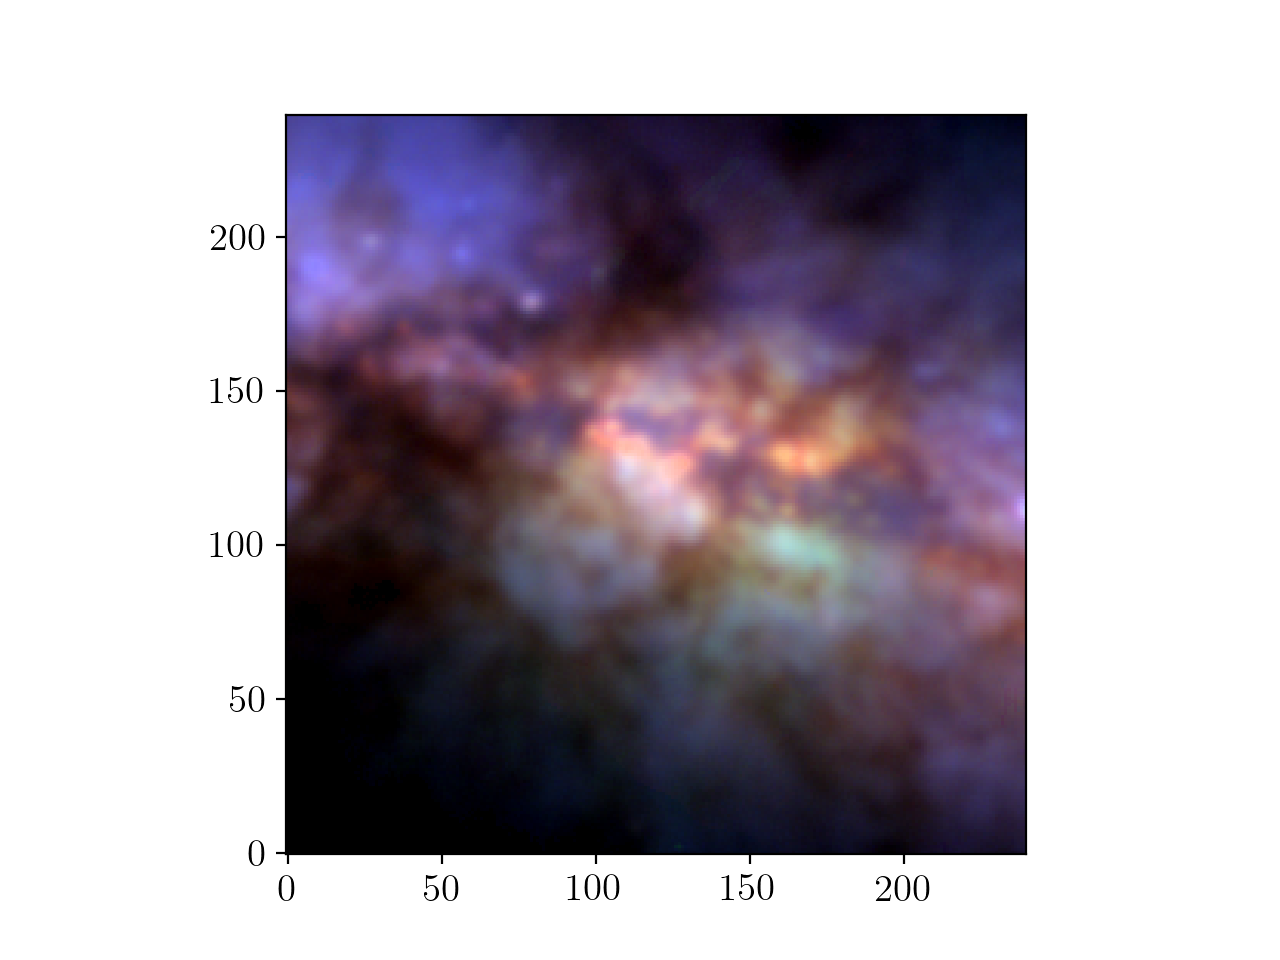

In [5]:
# Core of M82 from PANSTARRS, files available in the same folder
g_name = 'm82_rgb/cutout_rings.v3.skycell.2552.048.stk.g.unconv.fits'
r_name = 'm82_rgb/cutout_rings.v3.skycell.2552.048.stk.r.unconv.fits'
i_name = 'm82_rgb/cutout_rings.v3.skycell.2552.048.stk.i.unconv.fits'
g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data

rgb_default = make_lupton_rgb(i/3.5, r, g*3.5, minimum=5e3,stretch=3e4,Q=4)
plt.imshow(rgb_default, origin='lower',interpolation=None)

### Now onto adding WCS:
We use the basic method for plotting WCS coordinates in Astropy **without** cutting. All data cropping should have been done before hand.

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


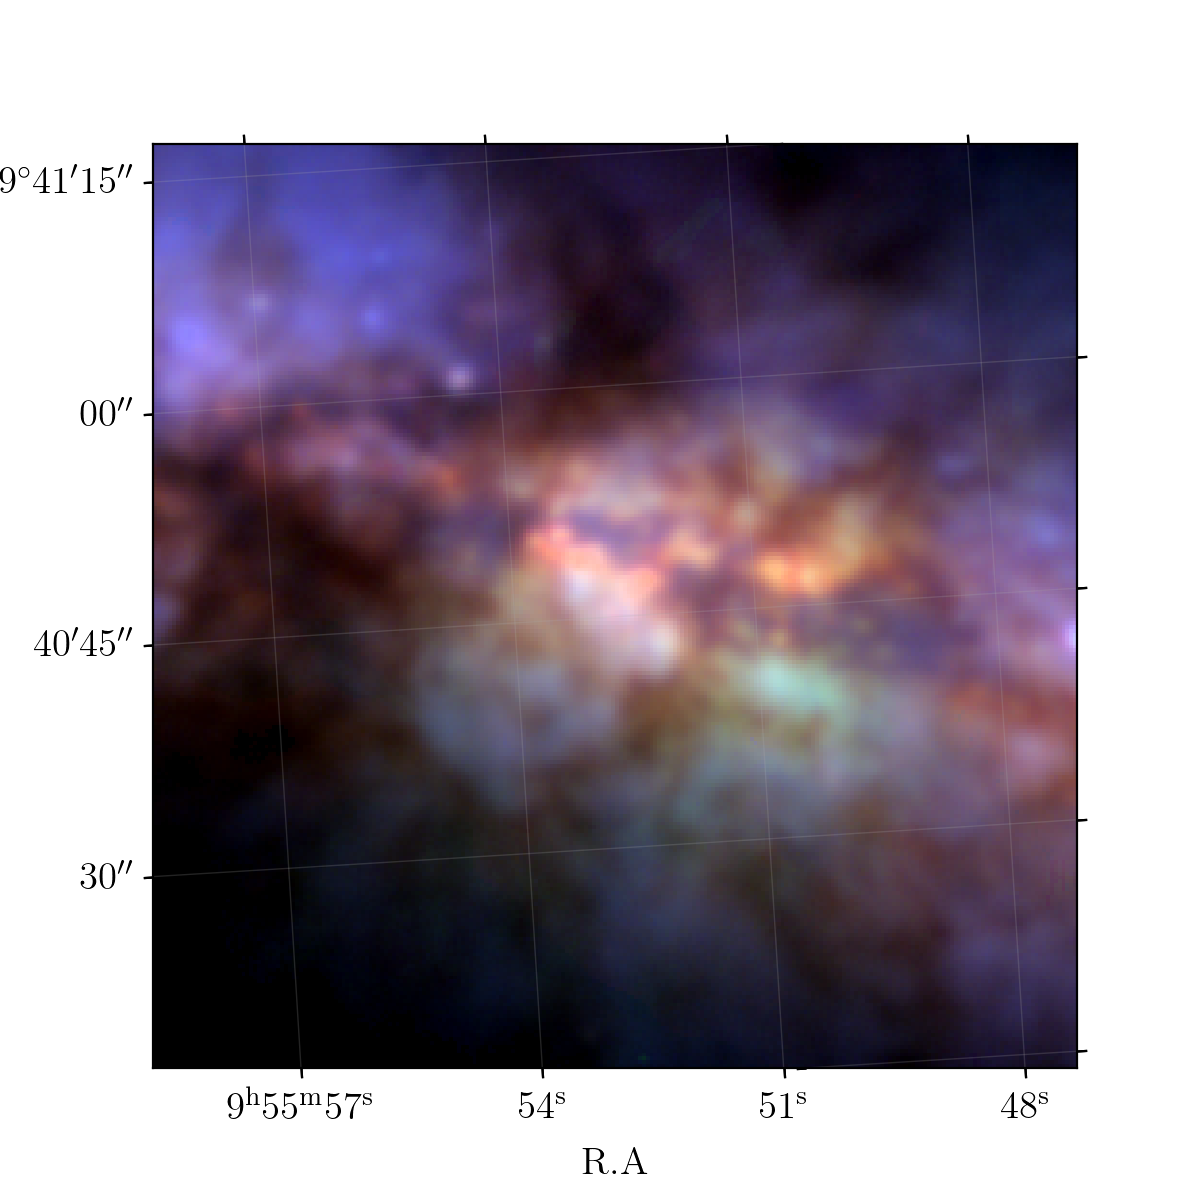

In [6]:
wcs = WCS(fits.open(g_name)[0].header, naxis=2)
data = rgb_default

figure = plt.figure(figsize=(6,6))
ax = figure.add_subplot(1,1,1, projection=wcs)
ax.imshow(data,
          aspect='equal',
          origin='lower', 
          interpolation='none',rasterized=True)

ax.grid(linewidth=0.5,alpha=0.2)
ax.set_xlabel(r"R.A", size=14)
ax.set_ylabel(r"Dec", size=14)
ax.tick_params(labelsize=14)
# Save the figure!
#pyplot.savefig('image.pdf',bbox_inches='tight')